In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset/Lung Cancer.csv


## Getting to know the dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.express as px 

In [3]:
df = pd.read_csv("/kaggle/input/lung-cancer-dataset/Lung Cancer.csv")
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [5]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

## Which factors are most common in patients who didn't survive?

In [6]:
num_col = ['id','age','bmi','cholesterol_level','hypertension','asthma','cirrhosis','other_cancer']
cat_col = ['gender','country','cancer_stage','family_history','smoking_status','treatment_type']

In [7]:
le = LabelEncoder()
for cols in cat_col:
    df[cols] = le.fit_transform(df[cols])
    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  int64  
 6   family_history      890000 non-null  int64  
 7   smoking_status      890000 non-null  int64  
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  int64  
 15  end_treatment_date  890000 non-nul

In [9]:
df = df.drop(['diagnosis_date', 'end_treatment_date'], axis=1)
df.corr()

,id,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
id,1.000000,0.000142,0.000079,0.000671,-0.001202,-0.000245,0.000236,-0.001144,-0.001507,-0.002296,0.000096,0.001167,-0.000872,0.000369,0.000517
age,0.000142,1.000000,-0.000945,-0.000309,0.000875,-0.001111,-0.000045,0.000915,0.001799,-0.001082,-0.000519,-0.000067,-0.000785,-0.001028,0.001233
gender,0.000079,-0.000945,1.000000,0.001468,-0.000161,0.000762,-0.000595,0.000504,0.000224,-0.000254,0.001142,0.001092,-0.000545,0.000040,0.000762
country,0.000671,-0.000309,0.001468,1.000000,-0.000665,-0.000624,0.001484,-0.000766,-0.000483,0.001479,-0.000521,-0.000690,0.002653,0.001365,0.000066
cancer_stage,-0.001202,0.000875,-0.000161,-0.000665,1.000000,0.000345,0.001160,-0.000446,-0.000504,0.000818,-0.001350,-0.000034,0.000260,-0.002192,0.002519
family_history,-0.000245,-0.001111,0.000762,-0.000624,0.000345,1.000000,-0.001261,0.000411,0.000086,-0.001639,-0.000808,0.002495,-0.000024,0.000310,0.001322
smoking_status,0.000236,-0.000045,-0.000595,0.001484,0.001160,-0.001261,1.000000,0.000901,0.001169,0.000408,-0.000140,0.001454,-0.000579,-0.000910,0.000087
bmi,-0.001144,0.000915,0.000504,-0.000766,-0.000446,0.000411,0.000901,1.000000,0.746905,0.001923,0.001662,0.000608,0.000771,0.000783,0.000007
cholesterol_level,-0.001507,0.001799,0.000224,-0.000483,-0.000504,0.000086,0.001169,0.746905,1.000000,0.002049,0.001263,0.000467,-0.000185,0.000113,0.000157
hypertension,-0.002296,-0.001082,-0.000254,0.001479,0.000818,-0.001639,0.000408,0.001923,0.002049,1.000000,0.108201,0.097139,0.073651,0.001566,0.000059


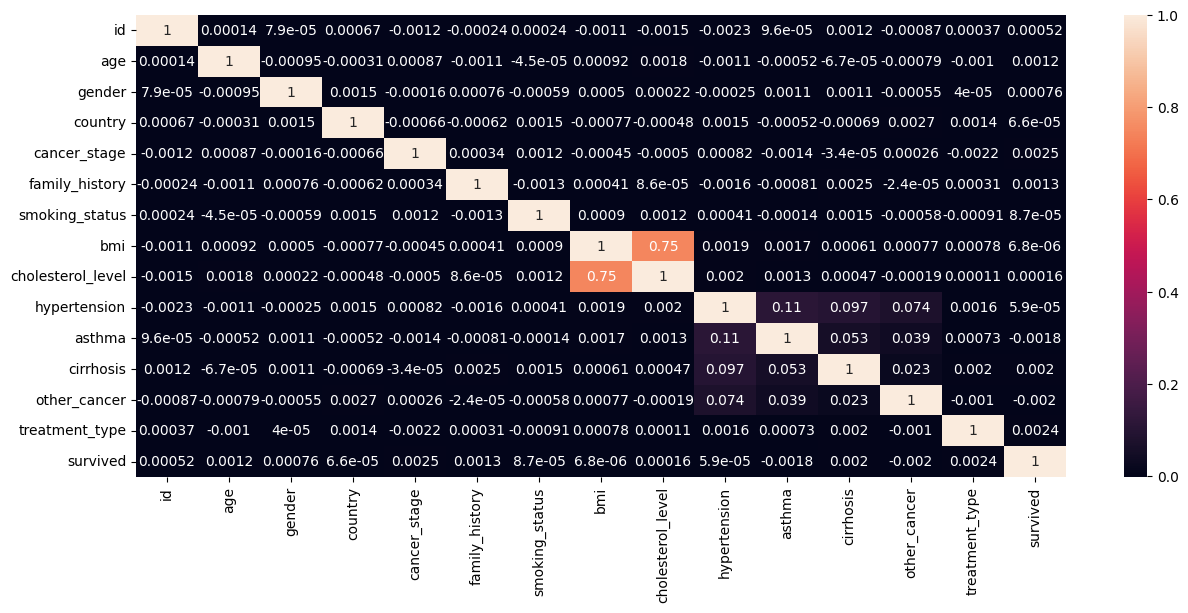

In [10]:
plt.figure(figsize=(15,6))  
sns.heatmap(df.corr(), annot=True)  
plt.show() 

In [11]:
corr_with_survived = df.corr()['survived'].sort_values()
print(corr_with_survived)

other_cancer        -0.001972
asthma              -0.001809
bmi                  0.000007
hypertension         0.000059
country              0.000066
smoking_status       0.000087
cholesterol_level    0.000157
id                   0.000517
gender               0.000762
age                  0.001233
family_history       0.001322
cirrhosis            0.001956
treatment_type       0.002354
cancer_stage         0.002519
survived             1.000000
Name: survived, dtype: float64


Based on correlation analysis alone, no single factor clearly stands out as more common in non-survivors. Slight trends suggest that comorbidities like other cancer and asthma may be slightly more present in non-survivors, but the effects are too small to draw strong conclusions.

## How does cancer stage relate to survival?

In [12]:
stage_mapping = {0: 'Stage I', 1: 'Stage II', 2: 'Stage III', 3: 'Stage IV'}
df['cancer_stage_label'] = df['cancer_stage'].map(stage_mapping)

stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
stage_df = df.groupby('cancer_stage_label')['survived'].mean().reindex(stage_order).reset_index()
stage_df['survival_rate'] = (stage_df['survived'] * 100).round(2)

fig = px.bar(
    stage_df,
    x='cancer_stage_label',
    y='survival_rate',
    text='survival_rate',
    title='Survival Rate by Cancer Stage',
    color_discrete_sequence=['#4CAF50'],
    width=700,
    height=400
)

# Style it
fig.update_traces(
    texttemplate='%{text}%', 
    textposition='outside',
    marker=dict(line=dict(width=1.5, color='black'))
)
fig.update_layout(
    yaxis_title='Survival Rate (%)',
    xaxis_title='Cancer Stage',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_range=[0, 100]
)

fig.show()

I checked if cancer stage affects survival — and surprisingly, the survival rate was almost exactly 22% across all four stages. That’s not what we’d expect in real life, so this might mean the data is synthetic or randomized. Still, it’s a good reminder to always explore and question the data before assuming patterns are meaningful.


## What is the impact of comorbidities (asthma, cirrhosis, hypertension) on lung cancer survival?

In [13]:
comorbidities = ['asthma', 'cirrhosis', 'hypertension']

for condition in comorbidities:
    group = df.groupby(condition)['survived'].mean().reset_index()
    group['survival_rate'] = (group['survived'] * 100).round(2)
    print(f"\n{condition.upper()} Survival Rates:")
    print(group)



ASTHMA Survival Rates:
   asthma  survived  survival_rate
0       0  0.220935          22.09
1       1  0.219433          21.94

CIRRHOSIS Survival Rates:
   cirrhosis  survived  survival_rate
0          0  0.219791          21.98
1          1  0.221729          22.17

HYPERTENSION Survival Rates:
   hypertension  survived  survival_rate
0             0  0.220187          22.02
1             1  0.220243          22.02


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   cancer_stage        890000 non-null  int64  
 5   family_history      890000 non-null  int64  
 6   smoking_status      890000 non-null  int64  
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  int64  
 14  survived            890000 non-null  int64  
 15  cancer_stage_label  890000 non-nul

I checked whether asthma, cirrhosis, or hypertension affected survival — and turns out… not really. The differences in survival rates were less than 0.2%, which is basically nothing. So in this dataset, comorbidities didn’t seem to play a big role in lung cancer survival.

## Do smoking habits correlate with cancer severity or survival?

In [15]:
import plotly.express as px


smoke_df = df.groupby('smoking_status')['survived'].mean().reset_index()


smoking_map = {
    0: 'Current',
    1: 'Former',
    2: 'Never',
    3: 'Passive'
}
smoke_df['smoking_status'] = smoke_df['smoking_status'].map(smoking_map)


smoke_df['survival_rate'] = (smoke_df['survived'] * 100).round(2)


smoke_df = smoke_df.sort_values('survival_rate')


fig = px.bar(
    smoke_df,
    x='smoking_status',
    y='survival_rate',
    text='survival_rate',
    title='Survival Rate by Smoking Status',
    color_discrete_sequence=['#FF9900'],
    width=750,
    height=400
)


fig.update_traces(
    texttemplate='%{text}%', 
    textposition='outside',
    marker=dict(line=dict(width=1.5, color='black'))
)
fig.update_layout(
    yaxis_title='Survival Rate (%)',
    xaxis_title='Smoking Status',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_range=[0, 100]
)

fig.show()


I expected survival rates to vary by smoking habit — like, current smokers should clearly be worse off, right? But in this dataset, everyone’s survival rate is weirdly the same. Even passive smokers and never-smokers are nearly identical. This probably means the data is synthetic or survival wasn’t really tied to smoking here. Still, it was a good reality check: not every dataset reflects real life.

